In [6]:
#Метод половинного ділення та метод хорд

import math
import numpy as np
from scipy.misc import derivative

eps=0.0001

def f(x):
    return 2*pow(x,4)- 8 * pow(x,3) - 16 * pow(x,2) - 1

def find_segments(): 
    search_range = np.arange(-10, 10, 1)
    
    a = None
    previous_x = None
    current_x  = None
    segments = []

    for x in search_range:
        x = round(x, 4)
        current_x = f(x)
        
        if previous_x != None and previous_x * current_x < 0:
            segments.append((a, x))
        
        a = x
        
        previous_x = current_x
    return segments

#метод половинного ділення   
def rec(a, b, eps):
    while (abs(a-b) > eps):
        if f(a)*f((a+b)/2)<0: 
            b = (a+b)/2 
        else: 
            a = (a+b)/2
        x = (a+b)/2
    
    print ('x= ', round(x,5), '  - метод половиного ділення')

#метод хорд
def hord (a,b,eps):
    
    if (f(a)*derivative(f,a,n=2)>0):
        x0=a
        xi=b
        
    else:
        x0=b
        xi=a
    xi_1=xi-(xi-x0)*f(xi)/(f(xi)-f(x0))
    
    while (abs(xi_1-xi)>eps):
        xi=xi_1
        xi_1=xi-(xi-x0)*f(xi)/(f(xi)-f(x0))
        
    print('x= ', round (xi_1,5) , '  - метод хорд')
    
segments = find_segments()
i = 0

for a, b in segments:
    print(f'Шукані елементи:  [{a}, {b}]')
    
    a = segments[i][0]
    b = segments[i][1]
    
    print(f'Розв’язок нелінійного рівняння на відрізку [{a},{b}]')
    rec(a,b,eps)
    hord(a,b,eps)
    
    i+=1
    

Шукані елементи:  [-2, -1]
Розв’язок нелінійного рівняння на відрізку [-2,-1]
x=  -1.49619   - метод половиного ділення


<ipython-input-6-5a9797eb4199>:46: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  if (f(a)*derivative(f,a,n=2)>0):


x=  -1.49614   - метод хорд
Шукані елементи:  [5, 6]
Розв’язок нелінійного рівняння на відрізку [5,6]
x=  5.46652   - метод половиного ділення
x=  5.4665   - метод хорд


Значення функції x 0 = 0.87
Значення функції x 1 = 3.12
Значення функції x 2 = -1.0
Значення функції x 3 = 0.0


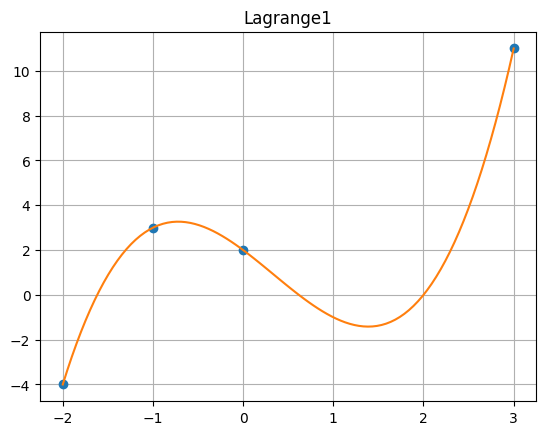

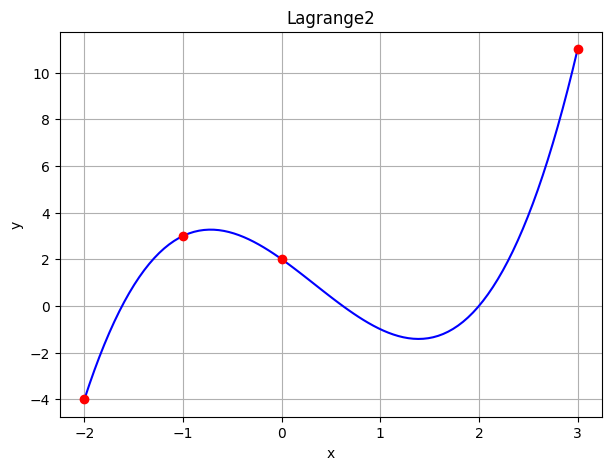

In [7]:
#Побудувати інтерполяційний багаточлен Лагранжа   для функції  , що задана таблицею, та з точністю до 0.001 обчислити наближені значення функції у заданих точках. 
#Побудувати графік інтерполяційної функції   за наявним набором точок. Зробити перевірку за допомогою scipy lagrange()
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange 

x=np.array([-2.,-1.,0.,3.], dtype=float)
y=np.array([-4.,3.,2.,11.], dtype=float)

x_test = np.array([-1.5,-0.5,1.,2.],)

def Lagrange(x,y,x_test):
    n = len(x)
    p = np.zeros(n)
    
    for i in range(n):
            p_i = 1
        for j in range(n):
            if i != j:
                p_i *= (x_test - x[j])/(x[i] - x[j])
        p[i] = p_i
    return np.dot(y, p)

n = len(x_test)
for i in range(n):
    a = x_test[i]
    lagr = Lagrange(x,y,a)
    print("Значення функції x", i,"=", lagr.round(2))
    
#Графік

xnew = np.linspace(np.min(x),np.max(x),100)
ynew = [Lagrange(x,y,i) for i in xnew]

plt.plot(x,y,'o',xnew,ynew)
plt.title('Lagrange1')
plt.grid(True)
plt.show()   

#Графік2 (Перевірка)

f = lagrange(x, y)
fig = plt.figure(figsize = (7,5))
plt.plot(xnew, f(xnew), 'b', x, y, 'ro')
plt.title('Lagrange2')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Значення сплайна:
x = 0.10, y = 2.650
x = 0.12, y = 2.686
x = 0.13, y = 2.717
x = 0.15, y = 2.741
x = 0.17, y = 2.760
x = 0.19, y = 2.774
x = 0.20, y = 2.783
x = 0.22, y = 2.787
x = 0.24, y = 2.786
x = 0.25, y = 2.781
x = 0.27, y = 2.772
x = 0.29, y = 2.760
x = 0.31, y = 2.744
x = 0.32, y = 2.725
x = 0.34, y = 2.703
x = 0.36, y = 2.678
x = 0.37, y = 2.651
x = 0.39, y = 2.621
x = 0.41, y = 2.590
x = 0.43, y = 2.557
x = 0.44, y = 2.523
x = 0.46, y = 2.487
x = 0.48, y = 2.451
x = 0.49, y = 2.414
x = 0.51, y = 2.377
x = 0.53, y = 2.339
x = 0.55, y = 2.302
x = 0.56, y = 2.265
x = 0.58, y = 2.229
x = 0.60, y = 2.194
x = 0.62, y = 2.160
x = 0.63, y = 2.127
x = 0.65, y = 2.096
x = 0.67, y = 2.066
x = 0.68, y = 2.037
x = 0.70, y = 2.010
x = 0.72, y = 1.983
x = 0.74, y = 1.958
x = 0.75, y = 1.935
x = 0.77, y = 1.913
x = 0.79, y = 1.892
x = 0.80, y = 1.872
x = 0.82, y = 1.854
x = 0.84, y = 1.837
x = 0.86, y = 1.822
x = 0.87, y = 1.808
x = 0.89, y = 1.795
x = 0.91, y = 1.784
x = 0.92, y = 1.774
x 

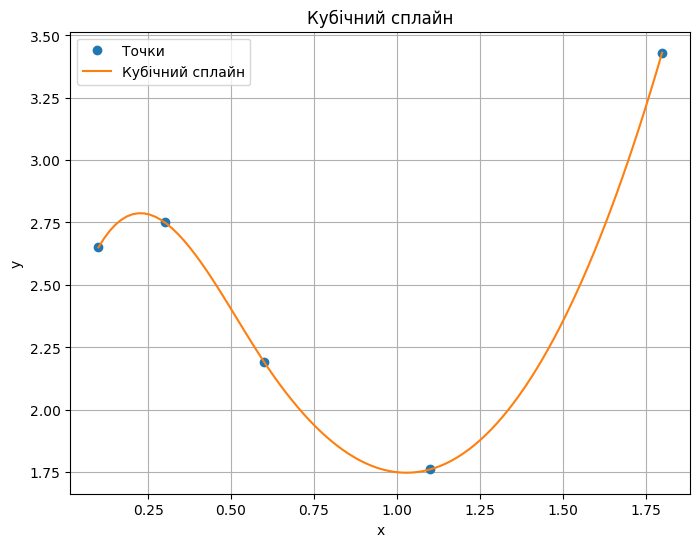

In [8]:
#3.	Побудувати апроксимуючу функцію у вигляді кубічного сплайну для таблично заданої функції та перевірити її роботу. Побудувати графік сплайну. 
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

x = np.array([0.1, 0.3, 0.6, 1.1, 1.8])
y = np.array([2.65, 2.75, 2.19, 1.76, 3.43])

n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n)
alpha = np.zeros(n)

for i in range(1, n):
    alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])
    
l = np.ones(n)
v = np.zeros(n)
z = np.zeros(n)

for i in range(1, n):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * v[i-1]
    v[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]
    
for j in range(n - 2, -1, -1):
    c[j] = z[j] - v[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])
    
cs = CubicSpline(x, y)

x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)

print("Значення сплайна:")

for i in range(len(x_new)):
    print(f"x = {x_new[i]:.2f}, y = {y_new[i]:.3f}")

#Графік

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()

x= [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
y= [1.18006658 1.32106099 1.42533561 1.49670671 1.54030231 1.56235775
 1.56996714 1.57080048 1.57279791 1.58385316]
a0 = 1.08, a1 = 1.32, a2 = -0.85


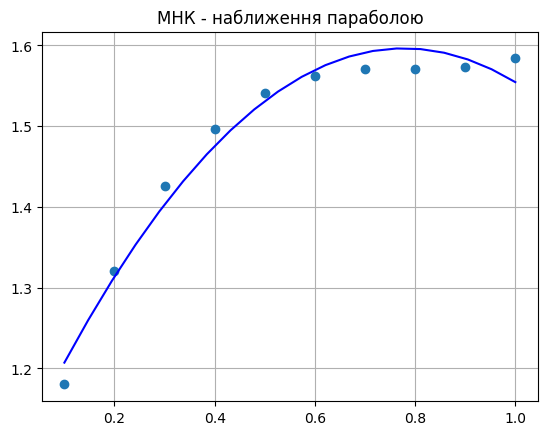

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

def func(x):
    return np.cos(2*x)+2*x

x = np.array([i * 0.1 for i in range(1, 11)])
y = np.array([func(xi) for xi in x]) 

print('x=', x)
print('y=', y)

def fun(a, x, y):
    return a[0] + a[1] * x + a[2] * x**2 - y

a0 = np.array([1, 1, 1])
res_lsq = least_squares(fun, x0=a0, args=(x, y))

print("a0 = %.2f, a1 = %.2f, a2 = %.2f" % tuple(res_lsq.x))

f = lambda x: sum([u * v for u, v in zip(res_lsq.x, [1, x, x**2])])

x_p = np.linspace(min(x), max(x), 20)
y_p = f(x_p)
plt.plot(x, y, 'o')
plt.plot(x_p, y_p, 'b')
plt.title("МНК - наближення параболою")
plt.grid(True)
plt.show()

x= [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
y= [1.18006658 1.32106099 1.42533561 1.49670671 1.54030231 1.56235775
 1.56996714 1.57080048 1.57279791 1.58385316]
a0 = 1.27, a1 = 0.39


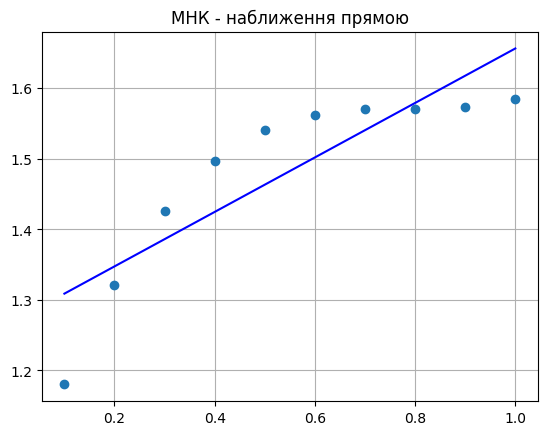

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

def func(x):
    return np.cos(2*x)+2*x

x = np.array([i * 0.1 for i in range(1, 11)])
y = np.array([func(xi) for xi in x])

print('x=', x)
print('y=', y)

def fun(a, x, y):
    return a[0] + a[1] * x - y

a0 = np.array([1, 1])

res_lsq = least_squares(fun, x0=a0, args=(x, y))
print("a0 = %.2f, a1 = %.2f" % tuple(res_lsq.x))

f = lambda x: res_lsq.x[0] + res_lsq.x[1] * x

x_p = np.linspace(min(x), max(x), 20)
y_p = f(x_p)
plt.plot(x, y, 'o')
plt.plot(x_p, y_p, 'b')
plt.title("МНК - наближення прямою")
plt.grid(True)
plt.show()

In [14]:
#метод прямокутника
from scipy import integrate
import numpy as np

eps = 0.001
n = 10
a = 1.3
b = 2.1

def f(x):
    return 1 / (np.sqrt(3*(pow(x,2))+ 0.4))

def left(f,a,b,n): 
    h=(b-a)/n 
    sum=0
    
    for i in range(0,n): 
        sum+=f(a+i*h) 
    return sum*h 

v,err = integrate.quad(f,a,b)

#Перевірка точності
if abs(left(f,a,b,2*10) - left(f,a,b,10))/3. <=eps:
    print("Лівий прямокутник:",round (left(f,a,b,10), 5)) 

def right(f,a,b,n): 
    h=(b-a)/n 
    sum=0 
    
    for i in range(1,n+1): 
        sum+=f(a+i*h) 
    return sum*h 

print("Правий прямокутник:",round (right(f,a,b,10), 5))

def aver(f,a,b,n): 
    h=0.08 
    sum=0
    
    for i in range(0,n): 
        sum+=f(a+i*h) 
    return sum*h 

print("Середній прямокутник:",round (aver(f,a,b,10), 5)) 
print("Перевірка методу прямокутників: ",round (v, 5))


Правий прямокутник: 0.26396
Середній прямокутник: 0.2765
Перевірка методу прямокутників:  0.27013


In [15]:
#Метод Сімпсона
from scipy import integrate
import numpy as np

n = 8
a = 1.3
b = 2.1

def simpson_met(f, a, b, n):
    h = (b - a) / n 
    integr = f(a) + f(b) 
    
    for i in range(1,n): 
        k = a + i*h 
        
        if i%2 == 0: 
            integr += 2 * f(k) 
        
        else: 
            integr += 4 * f(k) 
    
    integr *= h/3 
    
    return integr 

integral1 = simpson_met(f, a, b, n)
n *= 2
integral2 = simpson_met(f, a, b, n)

while abs(integral2 - integral1) / 15 > 0.001:
    integral1 = integral2
    n *= 2
    integral2 = simpson_met(f, a, b, n)
    
print("Метод Сімпсона:", round(integral2, 3))

v,err = integrate.quad(f,a,b) 
print("Перевірка методу Сімпсона:", round(v, 3))

Метод Сімпсона: 0.27
Перевірка методу Сімпсона: 0.27


In [16]:
#метод трапецій

from scipy import integrate
import numpy as np

n = 20
a = 1.3
b = 2.1

def f(x):
    return 1 / (np.sqrt(3*(pow(x,2))+ 0.4))

def trapeze(f, a, b, n):
    
    h = (b - a) / n
    x = a
    
    sum = 0
    
    for i in range(1, n):
        x += h
        sum += 2 * f(x)
    
    sum += f(b)
    integral = h / 2 * sum

    return integral

#Перевірка точності 

integral1 = trapeze(f, a, b, n)
n *= 2
integral2 = trapeze(f, a, b, n)

while abs(integral2 - integral1) / 3 > 0.001:
    integral1 = integral2
    n *= 2
    integral2 = trapeze(f, a, b, n)

print("Метод трапеції:", round(integral2, 3))

v,err = integrate.quad(f,3.2,4)
print("Перевірка методу трапецій:",round(v, 5))

Метод трапеції: 0.268
Перевірка методу трапецій: 0.12816
